## Project objective

The goal of spam message classification is to accurately categorize messages as either "spam" or "not spam" so that they can be automatically filtered and potentially blocked or sent to a separate folder.

## Load the dataset

In [1]:
import pandas as pd
import numpy as np

messages = pd.read_csv("/Users/brindhamanivannan/Desktop/NLP/Project 1 - Spam Message Classification/spam.tsv", sep='\t')
messages

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


## Explore the dataset and preprocess the dataset

In [2]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [3]:
messages.shape

(5572, 4)

In [4]:
messages.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
messages.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [6]:
messages.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
messages.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
messages['label'].value_counts() *100 / (len(messages))

ham     86.593683
spam    13.406317
Name: label, dtype: float64

The dataset appears to be an imbalanced dataset with 86% ham messages and only 13% spam messages.


In [9]:
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [10]:
ham = messages[messages['label'] == 'ham']
ham.shape

(4825, 4)

In [11]:
spam = messages[messages['label'] == 'spam']
spam.shape

(747, 4)

In [12]:
spam.shape[0]

747

In [13]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [14]:
ham

,label,message,length,punct
2088,ham,"alright babe, justthought id sayhey! how u do...",136,6
1967,ham,What's a feathery bowa? Is that something guys...,76,4
4121,ham,Babe! How goes that day ? What are you up to ?...,126,13
4070,ham,Hope youre not having too much fun without me...,75,2
2812,ham,Thinkin about someone is all good. No drugs fo...,52,1
...,...,...,...,...
5499,ham,Now get step 2 outta the way. Congrats again.,45,2
849,ham,Yeah there's barely enough room for the two of...,105,4
1152,ham,"Sorry, I'll call later",22,2
1769,ham,How. Its a little difficult but its a simple w...,68,1


In [15]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [16]:
messages = ham.append(spam, ignore_index=True)
messages

,label,message,length,punct
0,ham,"alright babe, justthought id sayhey! how u do...",136,6
1,ham,What's a feathery bowa? Is that something guys...,76,4
2,ham,Babe! How goes that day ? What are you up to ?...,126,13
3,ham,Hope youre not having too much fun without me...,75,2
4,ham,Thinkin about someone is all good. No drugs fo...,52,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [17]:
messages['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

Now we have a balanced dataset.


## Visualize the length column



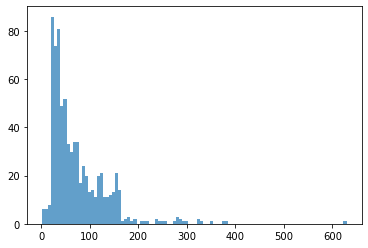

In [18]:
import matplotlib.pyplot as plt
plt.hist(messages[messages['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.show()         

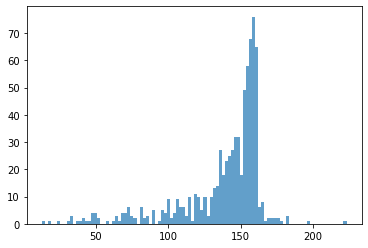

In [19]:
plt.hist(messages[messages['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()  

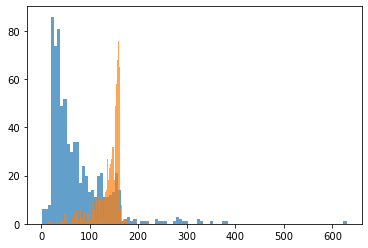

In [20]:
plt.hist(messages[messages['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(messages[messages['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

Whenever the length of the message is high (orange), the probability for it to be a spam message, is high.

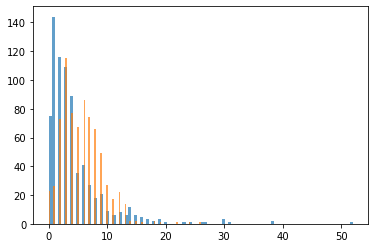

In [21]:
plt.hist(messages[messages['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(messages[messages['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

We see as above, this column punct does not affect the classification of the messages as ham or spam.


## Split the train and test data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(messages['message'], messages['label'], test_size = 0.3, random_state = 0, shuffle = True)

In [23]:
X_train

1438      You have 1 new message. Please call 08715205273
431     Also that chat was awesome but don't make it r...
194     Msgs r not time pass.They silently say that I ...
240             Ok da, i already planned. I wil pick you.
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                         Oh yeah clearly it's my fault
684     Are you happy baby ? Are you alright ? Did you...
Name: message, Length: 1045, dtype: object

In [24]:
X_train.shape

(1045,)

In [25]:
X_test

799     Ur cash-balance is currently 500 pounds - to m...
1047    FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1436    TheMob>Hit the link to get a premium Pink Pant...
54      ME 2 BABE I FEEL THE SAME LETS JUST 4GET ABOUT...
793     Think ur smart ? Win £200 this week in our wee...
                              ...                        
824     You will recieve your tone within the next 24h...
822     URGENT!: Your Mobile No. was awarded a £2,000 ...
644                            Oh my God. I'm almost home
1034    Sexy Singles are waiting for you! Text your AG...
1356    Congrats! 2 mobile 3G Videophones R yours. cal...
Name: message, Length: 449, dtype: object

In [26]:
X_test.shape

(449,)

In [27]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [28]:
y_train.shape

(1045,)

In [29]:
y_test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
824     spam
822     spam
644      ham
1034    spam
1356    spam
Name: label, Length: 449, dtype: object

In [30]:
y_test.shape

(449,)

## Building the Random Forest Model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

## Feature extraction - Convert textual data to numbers using tfidf encoding technique

In [32]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

We have created a pipeline object and passed TfidfVectorizer() and RandomForestClassifier() as a list.

RandomForestClassifier() has a lot of hyperparameters. n_estimators is one of them.

In [33]:
classifier

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [34]:
## training 
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

## Predicting the Random Forest results

In [35]:
y_pred = classifier.predict(X_test)
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'spam', 'ham', 'ham'

In [36]:
y_test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
824     spam
822     spam
644      ham
1034    spam
1356    spam
Name: label, Length: 449, dtype: object

In [37]:
## Get the accuracy score of the classification

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [38]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [39]:
0.9465478841870824 * 449 # 449 testing records

425.0

 We got 425/449 samples right.

In [40]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 19, 203]])

225, 203 were right

2, 19 were wrong

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.99      0.96       227
        spam       0.99      0.91      0.95       222

    accuracy                           0.95       449
   macro avg       0.96      0.95      0.95       449
weighted avg       0.96      0.95      0.95       449



## Building the SVM Model

In [43]:
from sklearn.svm import SVC
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

## Predicting the SVM results

In [44]:
y_pred = svm.predict(X_test)
y_pred

array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
       'ham', 'spam', 'ham', 'spam', 'spam', 'spam', 'spam', 'spam',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham',
       'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam',
       'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham',
       'spam', 'spam', 'ham', 'spam', 'ham', 'spam'

In [45]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [46]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 21, 201]])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.91      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [48]:
message1 = ["We will learn the basic structure of a sentiment analysis problem."]
message2 = ["Welcome to Data Science. Hope you're having fun learning."]
message3 = ["Congratulations on the new job"]
message4 = ["Congratulations on winning the lottery worth $1 Million ! To claim call on 5674531234'"]


In [49]:
print(classifier.predict(message1))
print(classifier.predict(message2))
print(classifier.predict(message3))
print(classifier.predict(message4))

['ham']
['ham']
['ham']
['spam']


In [50]:
print(svm.predict(message1))
print(svm.predict(message2))
print(svm.predict(message3))
print(svm.predict(message4))

['ham']
['ham']
['spam']
['spam']
